## Imports

In [73]:
# Import libraries and functions:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Import our own implementations
import importlib, gradient_descent, OLS, prepare_data, polynomial_features, Ridge
importlib.reload(gradient_descent)
importlib.reload(OLS)
importlib.reload(prepare_data)
importlib.reload(polynomial_features)
importlib.reload(Ridge)

from prepare_data import prepare_data
from polynomial_features import polynomial_features
from gradient_descent import gradient_descent_OLS, gradient_descent_Ridge, \
    momentum_gradient_descent_OLS, momentum_gradient_descent_Ridge, \
        ADAGrad_gradient_descent_OLS, ADAGrad_gradient_descent_Ridge, \
        RMSProp_gradient_descent_OLS, RMSProp_gradient_descent_Ridge
from OLS import OLS_parameters
from Ridge import Ridge_parameters

## Testing functions

### Gradient Descent with momentum, OLS

In [56]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 9
# Momentum
mom = 0.9

eta = 1e-1

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = momentum_gradient_descent_OLS(X_train_s, y_train, eta=eta, momentum=mom, num_iters=100000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")


GD parameters:  [-0.02399754 -2.17022719  0.13507465  6.18373532 -0.16311327 -7.11578378
 -0.06838117  2.87386513  0.12505772]
Number of iterations: 100000
Closed-form OLS coefficients:  [-0.0225844  -2.17035032  0.12193737  6.18488693 -0.12361183 -7.11824041
 -0.11534704  2.87533016  0.14434382]
GD parameters equal to closed-form parameters: [False  True False  True False  True False  True False].
Tolerance = 0.001


### Gradient Descent with momentum, Ridge

In [57]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 12
lam = 0.001
eta = 1e-3
mom = 0.7

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = momentum_gradient_descent_Ridge(X_train_s, y_train, lam = lam, eta=eta, momentum=mom, num_iters=100000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")


GD parameters:  [-0.02915664 -1.93958162  0.15224537  4.90163882 -0.20217312 -4.32242912
  0.01640955 -0.3762521   0.05480901  2.23007591  0.01042555 -0.72393733]
Number of iterations: 100000
Closed-form Ridge coefficients:  [-0.02823547 -2.0857958   0.17182606  5.82212846 -0.30706498 -6.08124119
  0.1138234   0.2967647   0.13117538  3.30600763 -0.0816156  -1.49235448]
GD parameters equal to closed-form parameters: [ True False False False False False False False False False False False].
Tolerance = 0.001


### Gradient Descent with ADAGrad, OLS

In [58]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 8

eta = 1e-1

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = ADAGrad_gradient_descent_OLS(X_train_s, y_train, eta=eta, num_iters=100000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.03441359 -2.05738066  0.21436727  5.64738487 -0.38969629 -6.31056542
  0.21283848  2.49075218]
Number of iterations: 100000
Closed-form OLS coefficients:  [-0.03172183 -2.16960132  0.21194351  6.17747521 -0.40515686 -7.10165138
  0.22890591  2.86511371]
GD parameters equal to closed-form parameters: [False False False False False False False False].
Tolerance = 0.001


### Gradient Descent with ADAGrad, Ridge

In [59]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Set conditions
p = 15
lam = 0.01
eta = 1e-1


# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = ADAGrad_gradient_descent_Ridge(X_train_s, y_train, lam = lam, eta=eta, num_iters=100000)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = Ridge_parameters(X_train_s, y_train, lam)
print("Closed-form Ridge coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

GD parameters:  [-0.03662285 -1.52076014  0.14968288  2.73689418 -0.11133454 -0.94920614
 -0.06475236 -0.97053031  0.00689175 -0.06660926  0.02362131  0.40343737
  0.0121231   0.14299703  0.02591019]
Number of iterations: 100000
Closed-form Ridge coefficients:  [-0.03626942 -1.53567779  0.14905128  2.81798351 -0.11207829 -1.06352601
 -0.06879667 -0.98778649  0.01400757  0.00861821  0.02764291  0.45965183
  0.00958665  0.07642972  0.02198606]
GD parameters equal to closed-form parameters: [ True False  True False  True False False False False False False False
 False False False].
Tolerance = 0.001


### Gradient Descent with RMSProp, OLS

In [81]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Polynomial degree
p = 8

eta = 1e-4

# make feature matrices, scale data
X_plot = polynomial_features(x, p, intercept=False)
X_train = polynomial_features(x_train, p, intercept=False)
X_test  = polynomial_features(x_test, p, intercept=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)
X_plot_s  = scaler.transform(X_plot)



beta, t = RMSProp_gradient_descent_OLS(X_train_s, y_train, eta=eta, num_iters=100000, print_num_iters=True)
print("GD parameters: ", beta)
print(f"Number of iterations: {t}")
beta_closed = OLS_parameters(X_train_s, y_train)
print("Closed-form OLS coefficients: ", beta_closed)
tol=1e-3
is_close = np.isclose(beta, beta_closed, rtol=tol, atol=tol)
print(f"GD parameters equal to closed-form parameters: {is_close}.")
print(f"Tolerance = {tol}")

Nådde max iterasjoner: 100000
GD parameters:  [-0.03542345 -2.01833928  0.21532774  5.46234237 -0.38459967 -6.03350584
  0.20728573  2.35946621]
Number of iterations: 100000
Closed-form OLS coefficients:  [-0.03172183 -2.16960132  0.21194351  6.17747521 -0.40515686 -7.10165138
  0.22890591  2.86511371]
GD parameters equal to closed-form parameters: [False False False False False False False False].
Tolerance = 0.001


### Gradient Descent with RMSProp, Ridge

### Gradient Descent with ADAM, OLS

### Gradient Descent with ADAM, Ridge

## Computing parameters with different gradient descent methods

### OLS

In [82]:
# Prepare data
x, y, x_train, x_test, y_train, y_test, y_noisy = prepare_data(n=100)

# Initialize variables:
deg_max = 15
eta = 1e-2

# Lists for MSEs
MSE_closed_form_OLS = []
MSE_gd_fixed_learning_rate_OLS = []
MSE_gd_momentum_OLS = []
MSE_gd_ADAGrad_OLS = []
MSE_gd_RMSProp_OLS = []
MSE_gd_ADAM_OLS = []

# Lists for R2-scores
R2_score_closed_form_OLS=[]
R2_gd_fixed_learning_rate_OLS = []
R2_gd_momentum_OLS = []
R2_gd_ADAGrad_OLS = []
R2_gd_RMSProp_OLS = []
R2_gd_ADAM_OLS = []

# Lists for n_iterations
num_iterations_gd_fixed_learning_rate_OLS = []
num_iterations_gd_momentum_OLS = []
num_iterations_gd_ADAGrad_OLS = []
num_iterations_gd_RMSProp_OLS = []
num_iterations_gd_ADAM_OLS = []

# Loop over degrees
for p in range(1, deg_max+1):
    
    # Make feature matrices, scale
    X_plot = polynomial_features(x, p, intercept=False)
    X_train = polynomial_features(x_train, p, intercept=False)
    X_test  = polynomial_features(x_test, p, intercept=False)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s  = scaler.transform(X_test)
    X_plot_s  = scaler.transform(X_plot)
    
    # Compute parameters with gradient descent methods and analytical solutions
    beta_closed = OLS_parameters(X_train_s, y_train)
    # Fixed learning rate:
    beta_gd_fixed_rate, t = gradient_descent_OLS(X_train_s, y_train, eta = 1e-1, num_iters=100000)
    num_iterations_gd_fixed_learning_rate_OLS.append(t)
    # With momentum:
    beta_gd_momentum, t = momentum_gradient_descent_OLS(X_train_s, y_train, eta = 1e-1, momentum = 0.9, num_iters=100000)
    num_iterations_gd_momentum_OLS.append(t)
    # With ADAGrad:
    beta_gd_ADAGrad, t = ADAGrad_gradient_descent_OLS(X_train_s, y_train, eta = 1e-1, num_iters=100000)
    num_iterations_gd_ADAGrad_OLS.append(t)
    # With RMSProp:
    beta_gd_RMSProp, t = RMSProp_gradient_descent_OLS(X_train_s, y_train, eta = 1e-4, num_iters=100000)
    num_iterations_gd_RMSProp_OLS.append(t)
    # With ADAM:
    # beta_gd_ADAM, t = ADAM_gradient_descent_OLS(X_train_s, y_train, eta = eta, num_iters=100000)
    # num_iterations_gd_ADAM_OLS.append(t)
    
    # Compute y_offset
    y_offset = np.mean(y_train)
    # Predict
    y_pred_closed = X_test_s @ beta_closed + y_offset
    y_pred_gd_fixed_rate = X_test_s @ beta_gd_fixed_rate + y_offset
    y_pred_momentum = X_test_s @ beta_gd_momentum + y_offset
    y_pred_ADAGrad = X_test_s @ beta_gd_ADAGrad + y_offset
    y_pred_RMSProp = X_test_s @ beta_gd_RMSProp + y_offset
    # y_pred_ADAM = X_test_s @ beta_gd_ADAM + y_offset
    
    # Append MSEs
    MSE_closed_form_OLS.append(mean_squared_error(y_test, y_pred_closed))
    MSE_gd_fixed_learning_rate_OLS.append(mean_squared_error(y_test, y_pred_gd_fixed_rate))
    MSE_gd_momentum_OLS.append(mean_squared_error(y_test, y_pred_momentum))
    MSE_gd_ADAGrad_OLS.append(mean_squared_error(y_test, y_pred_ADAGrad))
    MSE_gd_RMSProp_OLS.append(mean_squared_error(y_test, y_pred_RMSProp))
    # MSE_gd_ADAM_OLS.append(mean_squared_error(y_test, y_pred_ADAM))

    
    # Append R2 scores
    R2_score_closed_form_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_closed))
    R2_gd_fixed_learning_rate_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_gd_fixed_rate))
    R2_gd_momentum_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_momentum))
    R2_gd_ADAGrad_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_ADAGrad))
    R2_gd_RMSProp_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_RMSProp))
    # R2_gd_ADAM_OLS.append(r2_score(y_true=y_test, y_pred = y_pred_ADAM))


### Plotting the results

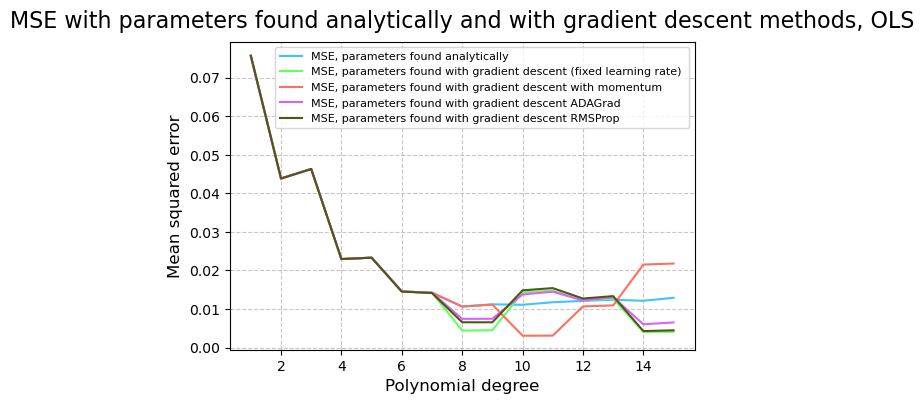

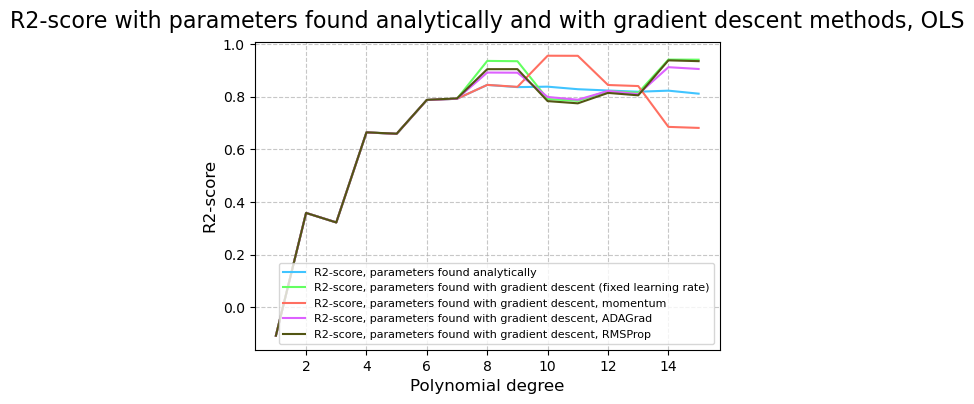

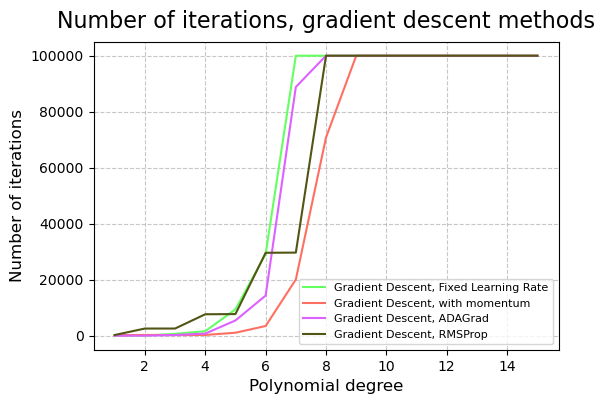

In [83]:
### Plotting results
degrees = np.arange(1, deg_max+1)

# MSE

plt.figure()
plt.plot(degrees, MSE_closed_form_OLS, label="MSE, parameters found analytically", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, MSE_gd_fixed_learning_rate_OLS, label="MSE, parameters found with gradient descent (fixed learning rate) ", color="#64FF61", linewidth=1.5)
plt.plot(degrees, MSE_gd_momentum_OLS, label="MSE, parameters found with gradient descent with momentum ", color='#FF6F61', linewidth=1.5)
plt.plot(degrees, MSE_gd_ADAGrad_OLS, label="MSE, parameters found with gradient descent ADAGrad ", color="#DD61FF", linewidth=1.5)
plt.plot(degrees, MSE_gd_RMSProp_OLS, label="MSE, parameters found with gradient descent RMSProp ", color="#525513", linewidth=1.5)
# plt.plot(degrees, MSE_gd_ADAM_OLS, label="MSE, parameters found with gradient descent ADAM ", color='#4E8888', linewidth=1.5)
plt.title("MSE with parameters found analytically and with gradient descent methods, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Mean squared error", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/mse_closed_form_and_gradient_descent_momentum_ols.pdf", bbox_inches="tight")
plt.show()

plt.plot(degrees, R2_score_closed_form_OLS, label="R2-score, parameters found analytically", color='#40C4FF', linewidth=1.5)
plt.plot(degrees, R2_gd_fixed_learning_rate_OLS, label="R2-score, parameters found with gradient descent (fixed learning rate)", color='#64FF61', linewidth=1.5)
plt.plot(degrees, R2_gd_momentum_OLS, label="R2-score, parameters found with gradient descent, momentum", color='#FF6F61', linewidth=1.5)
plt.plot(degrees, R2_gd_ADAGrad_OLS, label="R2-score, parameters found with gradient descent, ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(degrees, R2_gd_RMSProp_OLS, label="R2-score, parameters found with gradient descent, RMSProp", color="#525513", linewidth=1.5)
# plt.plot(degrees, R2_gd_ADAM_OLS, label="R2-score, parameters found with gradient descent, ADAM", color="#4E8888", linewidth=1.5)
plt.title("R2-score with parameters found analytically and with gradient descent methods, OLS", fontsize=16, fontfamily='sans-serif', pad=10)
plt.legend(fontsize=8)
plt.ylabel("R2-score", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/r2_closed_form_and_gradient_descent_momentum_ols.pdf", bbox_inches="tight")
plt.show()

plt.plot(degrees, num_iterations_gd_fixed_learning_rate_OLS, label="Gradient Descent, Fixed Learning Rate", color='#64FF61', linewidth=1.5)
plt.plot(degrees, num_iterations_gd_momentum_OLS, label="Gradient Descent, with momentum", color='#FF6F61', linewidth=1.5)
plt.plot(degrees, num_iterations_gd_ADAGrad_OLS, label="Gradient Descent, ADAGrad", color='#DD61FF', linewidth=1.5)
plt.plot(degrees, num_iterations_gd_RMSProp_OLS, label="Gradient Descent, RMSProp", color='#525513', linewidth=1.5)
# plt.plot(degrees, num_iterations_gd_ADAM_OLS, label="Gradient Descent, ADAM", color='#4E8888', linewidth=1.5)
plt.title(f"Number of iterations, gradient descent methods", fontsize=16, fontfamily='sans-serif', pad=10)
plt.ylabel("Number of iterations", fontsize=12, fontfamily='sans-serif')
plt.xlabel("Polynomial degree", fontsize=12, fontfamily='sans-serif')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.7)
fig = plt.gcf()
fig.set_size_inches(6, 4)
# plt.savefig("Plots/number_of_iterations_gradient_descent_momentum_ols.pdf", bbox_inches="tight")
plt.show()

In [63]:
num_iterations_gd_RMSProp_OLS

[356,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000,
 100000]